In [ ]:
!nvidia-smi

In [ ]:
import random
import uuid

In [ ]:
from IPython import display

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

import huggingface_hub

- Register in [Hugging Face hub](https://huggingface.co/)
- [Accept the model license](https://huggingface.co/CompVis/stable-diffusion-v1-4) (read the license and tick the checkbox) 
- [Get the API token](https://huggingface.co/docs/hub/security-tokens) (you'll find it [here](https://huggingface.co/settings/tokens))

In [ ]:
huggingface_hub.notebook_login()

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True
)  

In [ ]:
pipe = pipe.to("cuda")

Let's generate a dataset with pictures of dragons and dinosaurs using Stable Diffusion

In [ ]:
!mkdir dino dragon

In [ ]:
prompt_dragon = "a picture of a dragon"
prompt_dino = "a picture of a dinosaur"

In [ ]:
while True:
    if random.random() > 0.5:
        label = 'dino'
        prompt = prompt_dino
    else:
        label = 'dragon'
        prompt = prompt_dragon

    with autocast("cuda"):
        image = pipe(prompt)["sample"][0] 

    name = str(uuid.uuid4())
    path = f"{label}/{name}.jpg"
    image.save(path)

    print(f'saved to {path}')

Here's the code that we can use for generating rectangular (512x768) images

0it [00:00, ?it/s]

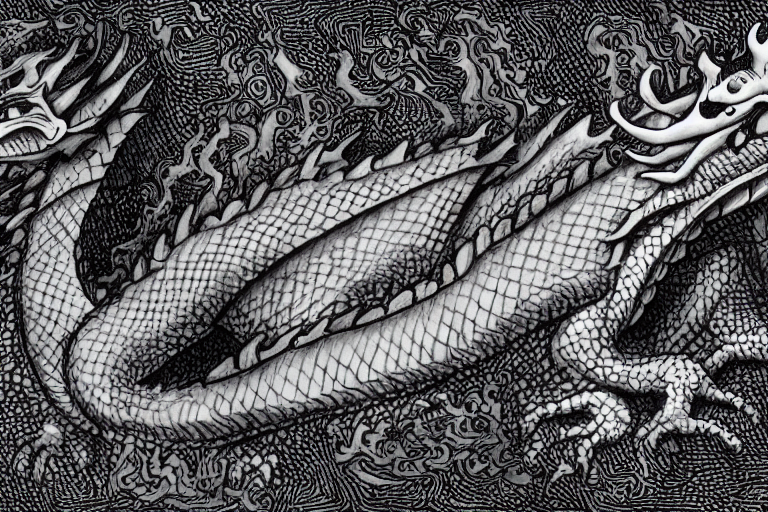

In [12]:
with autocast("cuda"):
    image = pipe(prompt_dragon, height=512, width=768)["sample"][0]
    display.display(image)